<a href="https://colab.research.google.com/github/tarramadhu869/Amazon_Global_Dashboard-Using-PowerBI/blob/main/Iris%2Bdata%2Banalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [30]:
iris_data = pd.read_csv('/content/iris.csv')
iris_data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
## checking for null values

iris_data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [33]:
## Univariate analysis
iris_data.groupby('class').agg(['mean', 'median'])  # passing a list of recognized strings
iris_data.groupby('class').agg([np.mean, np.median])

sepallength        sepalwidth        petallength         \
                       mean median       mean median        mean median   
class                                                                     
Iris-setosa           5.006    5.0      3.418    3.4       1.464   1.50   
Iris-versicolor       5.936    5.9      2.770    2.8       4.260   4.35   
Iris-virginica        6.588    6.5      2.974    3.0       5.552   5.55   

                petalwidth         
                      mean median  
class                              
Iris-setosa          0.244    0.2  
Iris-versicolor      1.326    1.3  
Iris-virginica       2.026    2.0

**Data Insights:**
1.All columns are not having any Null Entries

2.Four columns are numerical type

3.Only Single column categorical type

**Statistical Insight**

In [34]:
iris_data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking For Duplicate Entries**

In [35]:
iris_data[iris_data.duplicated()]

,sepallength,sepalwidth,petallength,petalwidth,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


**Checking the balance**

<ipython-input-36-3a15dc9550d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='sepalwidth',data= iris_data,palette='YlGnBu')


<Axes: xlabel='class', ylabel='sepalwidth'>

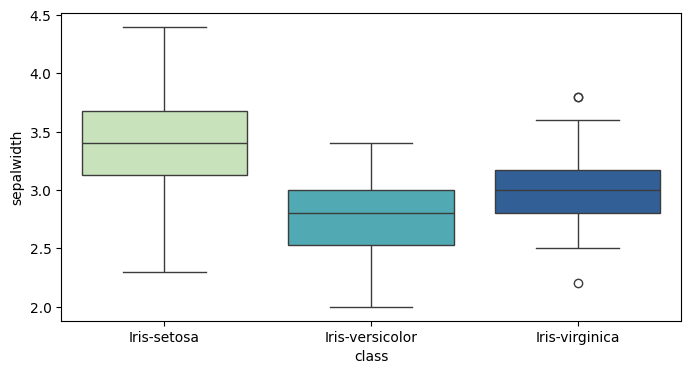

In [36]:
## Box plot
plt.figure(figsize=(8,4))
sns.boxplot(x='class',y='sepalwidth',data= iris_data,palette='YlGnBu')

In [37]:
iris_data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Data Visualization**

<ipython-input-38-e9bee751ff40>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=iris_data['petalwidth'], bins=40, color='b')


Text(0.5, 1.0, 'petal width distribution plot')

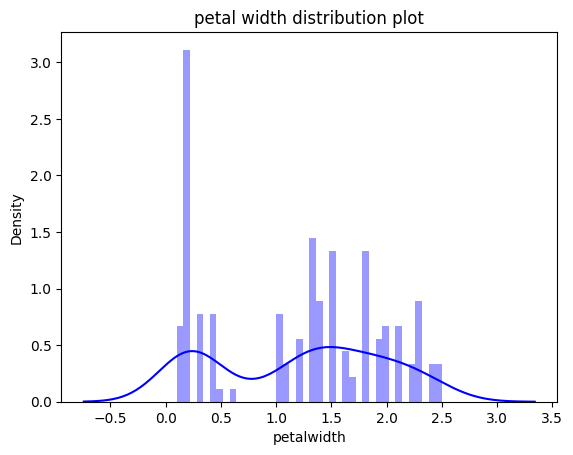

In [38]:
## Distribution of particular species
sns.distplot(a=iris_data['petalwidth'], bins=40, color='b')
plt.title('petal width distribution plot')

<Axes: title={'center': 'Class Count'}, xlabel='class', ylabel='count'>

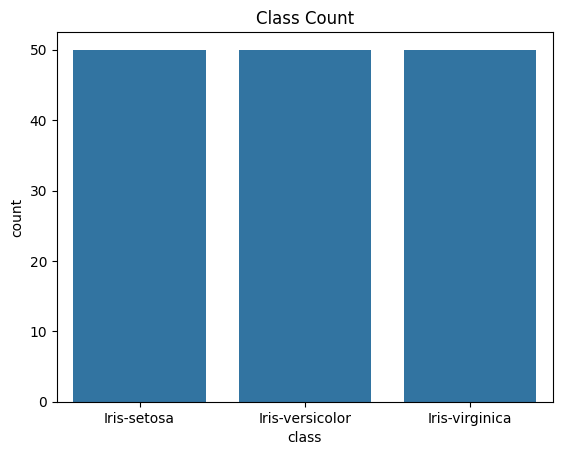

In [39]:
plt.title('Class Count')
## count of number of observation of each species

sns.countplot(x='class',data=iris_data)

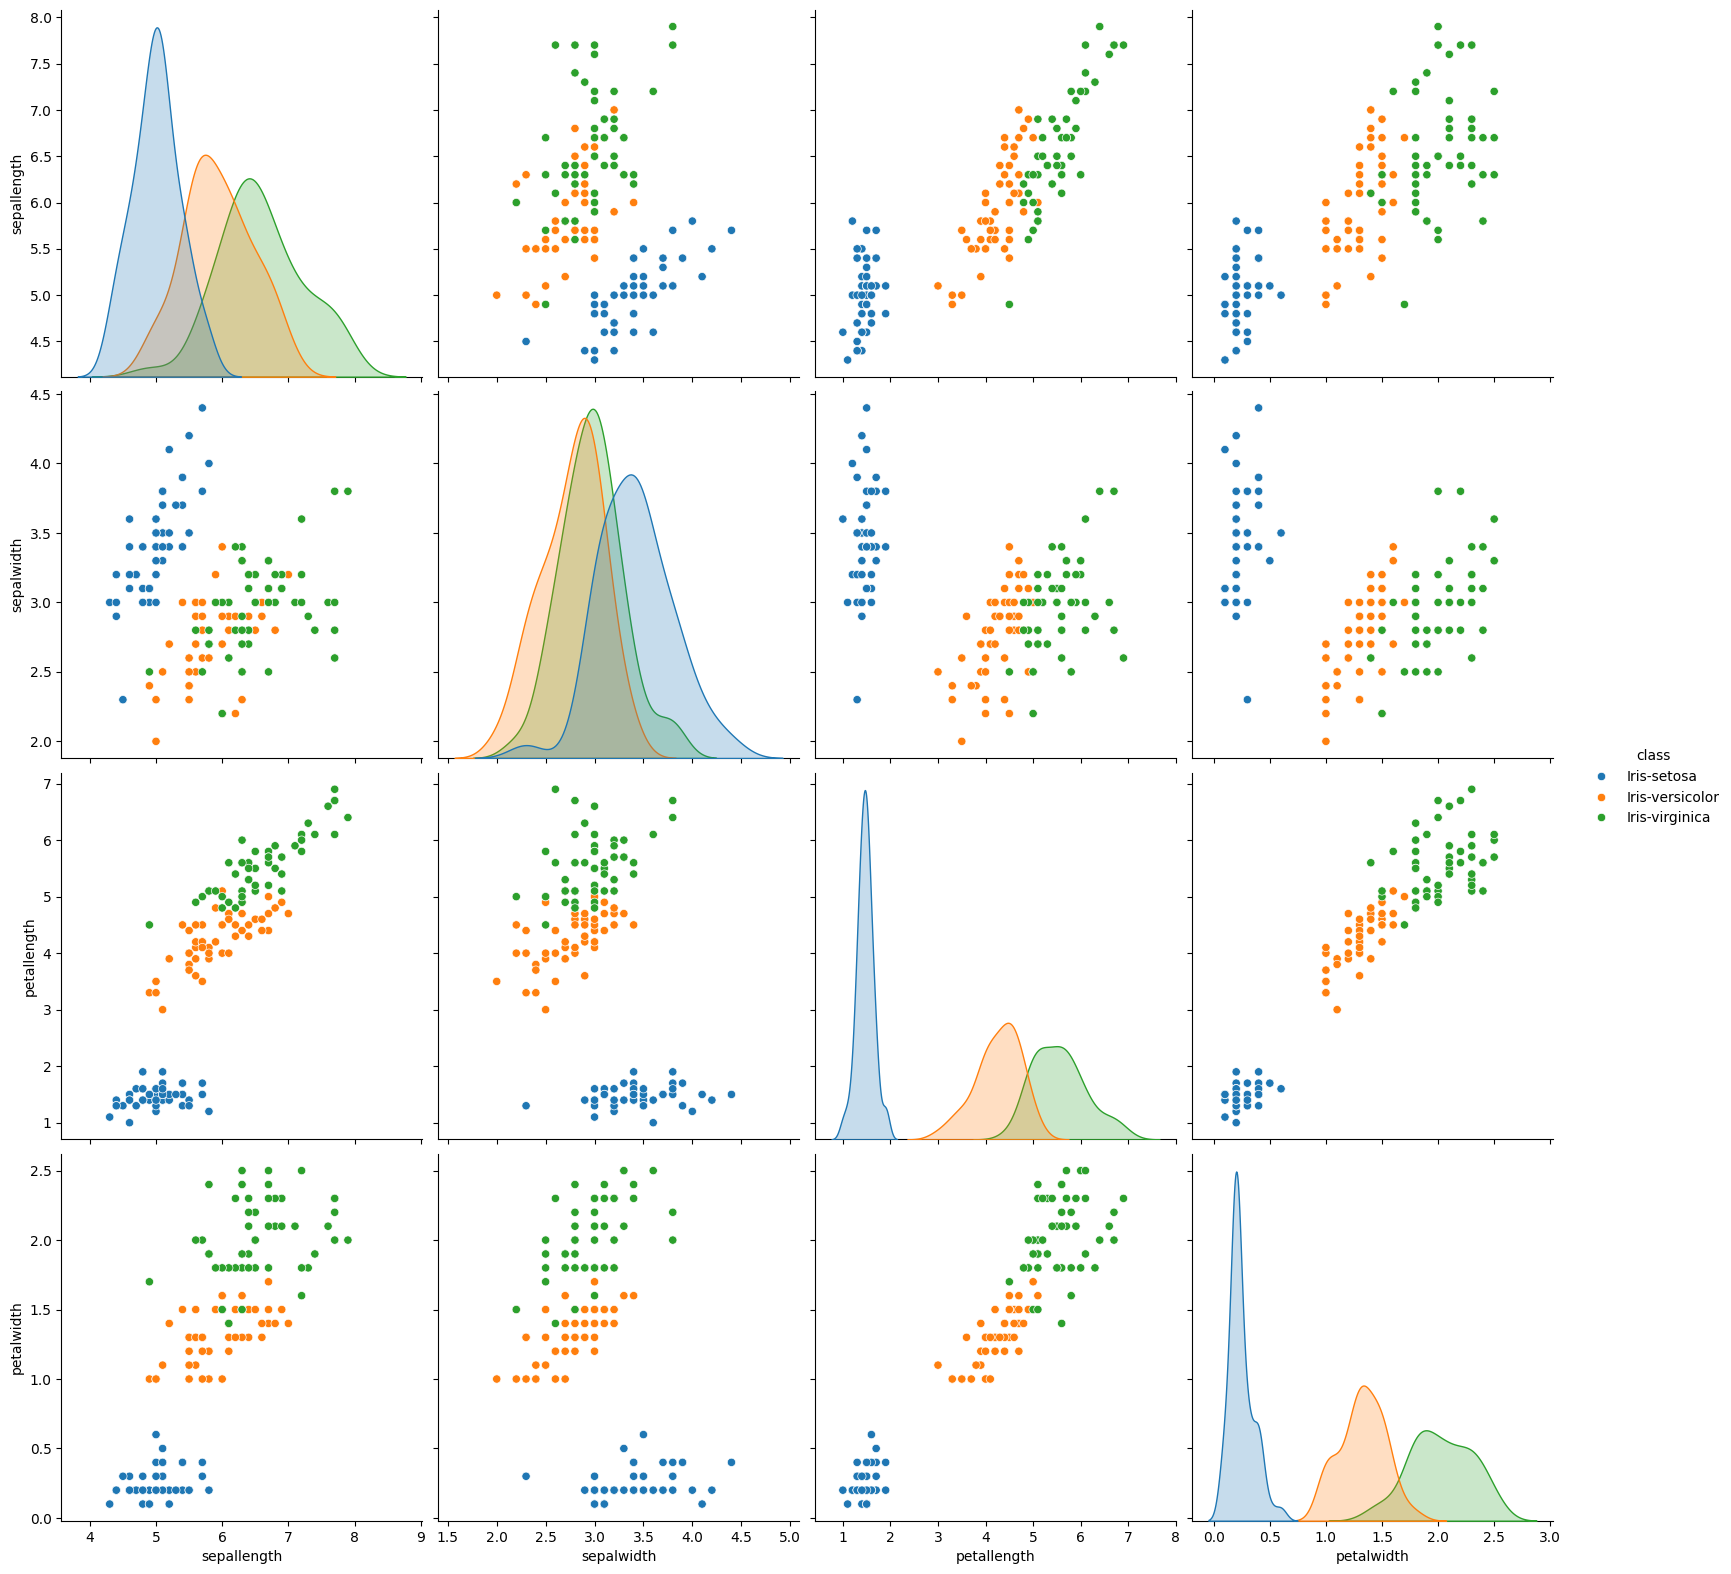

In [40]:
sns.pairplot(iris_data,hue='class',height=4)

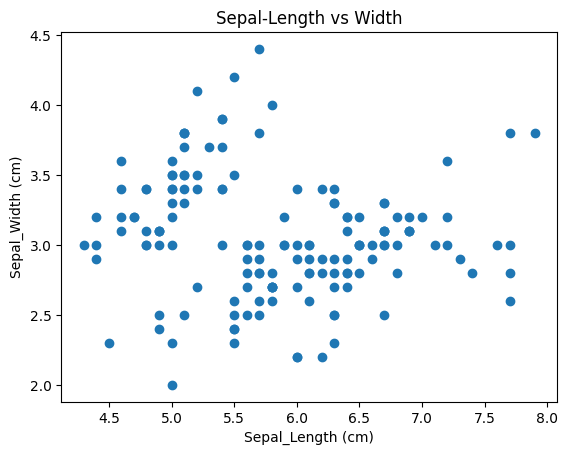

In [43]:
## Multivariate analysis – analyis between two or more variable or features
## Scatter plot to see the relation between two or more features like sepal length, petal length,etc
axis = plt.axes()

axis.scatter(iris_data.sepallength, iris_data.sepalwidth)

axis.set(xlabel='Sepal_Length (cm)',
   ylabel='Sepal_Width (cm)',
   title='Sepal-Length vs Width');

In [41]:
plt.figure(figsize=(10,11))
## Correlation map using a heatmap matrix

sns.heatmap(iris_data.corr(), linecolor='white', linewidths=1)

ValueError: could not convert string to float: 'Iris-setosa'

<Figure size 1000x1100 with 0 Axes>

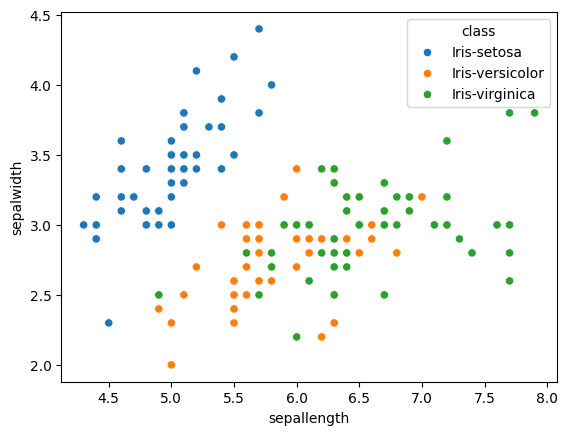

In [45]:
sns.scatterplot(x='sepallength', y='sepalwidth', hue='class', data=iris_data)
plt.show()

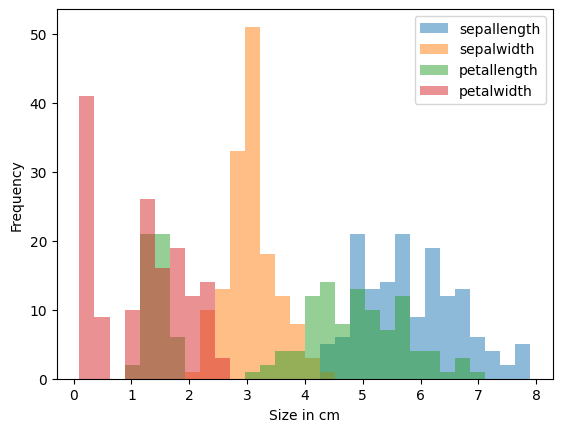

In [48]:
## From the above graph we can see that
# Iris-virginica has a longer sepal length while Iris-setosa has larger sepal width
# For setosa sepal width is more than sepal length
## Below is the Frequency histogram plot of all features
axis = iris_data.plot.hist(bins=30, alpha=0.5)
axis.set_xlabel('Size in cm');

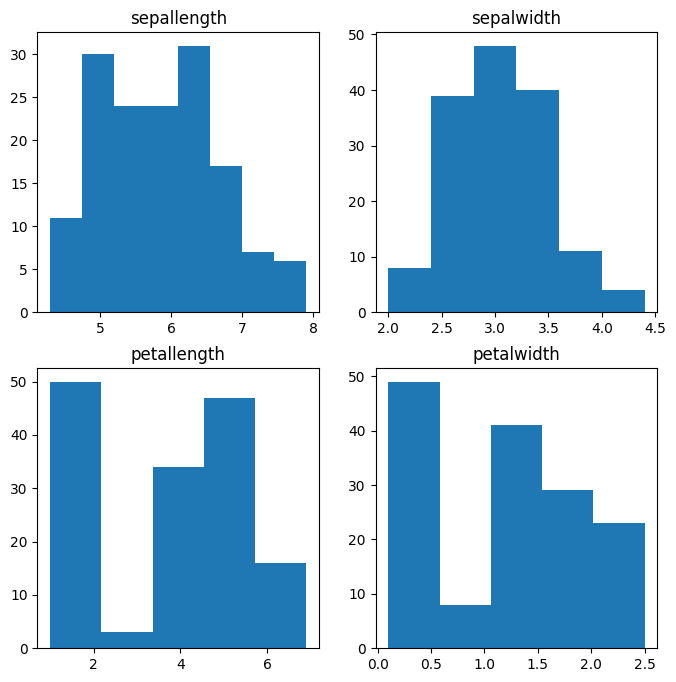

In [49]:
figure, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].set_title("sepallength")
ax[0,0].hist(iris_data['sepallength'], bins=8)

ax[0,1].set_title("sepalwidth")
ax[0,1].hist(iris_data['sepalwidth'], bins=6);

ax[1,0].set_title("petallength")
ax[1,0].hist(iris_data['petallength'], bins=5);

ax[1,1].set_title("petalwidth")
ax[1,1].hist(iris_data['petalwidth'], bins=5);

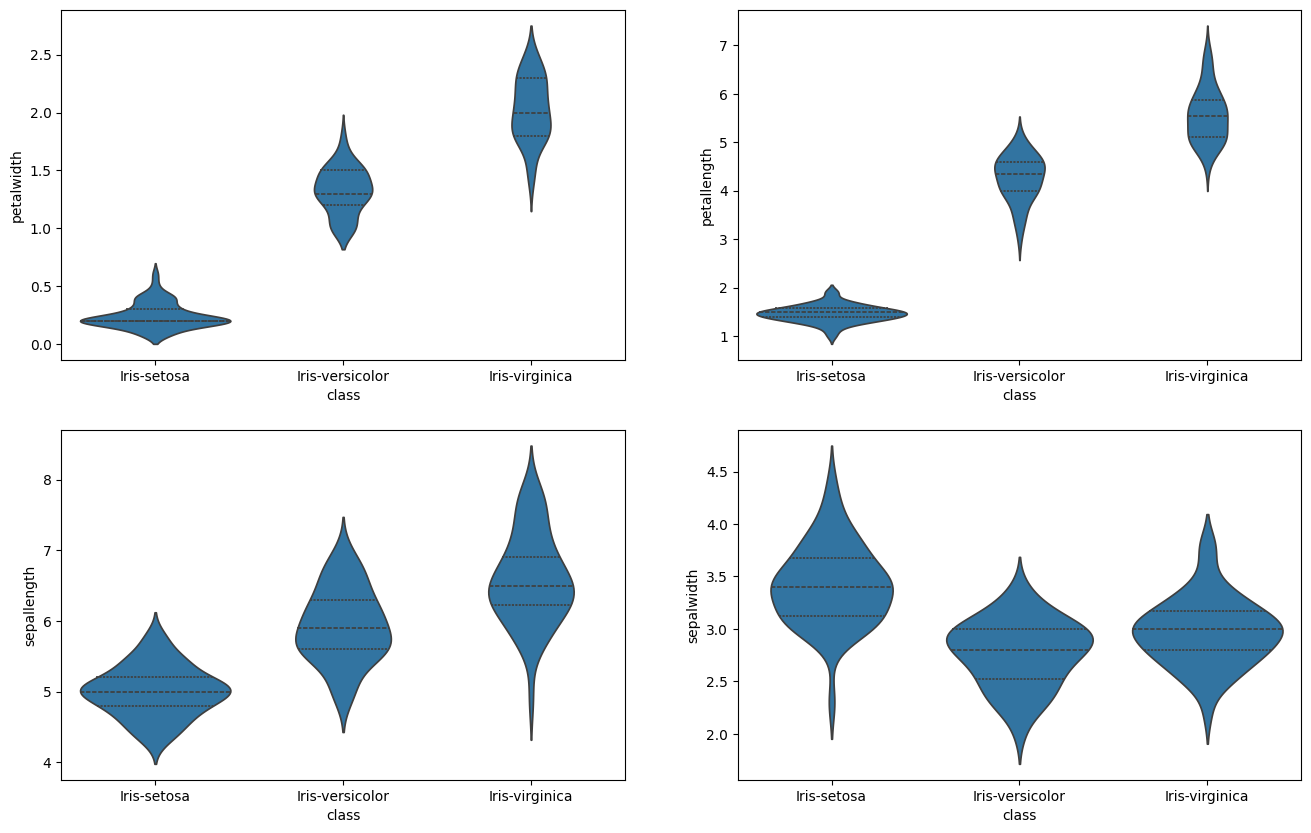

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.violinplot( y="petalwidth", x= "class", data=iris_data, orient='v' , ax=axes[0, 0],inner='quartile')
sns.violinplot( y='petallength', x= 'class', data=iris_data, orient='v' , ax=axes[0, 1],inner='quartile')
sns.violinplot( y='sepallength', x= 'class', data=iris_data, orient='v' , ax=axes[1, 0],inner='quartile')
sns.violinplot( y='sepalwidth', x= 'class', data=iris_data, orient='v' , ax=axes[1, 1],inner='quartile')
plt.show()